<a href="https://colab.research.google.com/github/Muhammad-Farhan-A/Kelompok-2-APM-B/blob/main/Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mengimport library
import pandas as pd
import numpy as np

In [ ]:
#menampilkan dataset
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#melihat informasi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#menghapus baris data yang tidak memiliki nilai dan mengubah tipe data string menjadi numerik
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
dataset['gender'] = enc.fit_transform(dataset['gender'].values)
dataset['ever_married'] = enc.fit_transform(dataset['ever_married'].values)
dataset['work_type'] = enc.fit_transform(dataset['work_type'].values)
dataset['Residence_type'] = enc.fit_transform(dataset['Residence_type'].values)
dataset['smoking_status'] = enc.fit_transform(dataset['smoking_status'].values)
dataset.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
#menghapus kolom yang tidak digunakan serta mengubah tipe data
dataset = dataset.drop(["id", "bmi"], axis = 1)
dataset["age"] = dataset["age"].astype("int")
dataset["avg_glucose_level"] = dataset["avg_glucose_level"].astype("int")
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status',
       'stroke'],
      dtype='object')

In [ ]:
#analisis data
dataset['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
#menentukan variabel independen dan dependen
x = dataset.drop(['stroke'], axis = 1)
y = dataset['stroke']

In [ ]:
#megimport package model selection dari SKlearn
from sklearn.model_selection import train_test_split
#membagi daataset menjadi data training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#mengaktifkan package StandardScaler 
from sklearn.preprocessing import StandardScaler
#mengubah skala data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#mengimport package KNeighbors dari SKlearn
from sklearn.neighbors import KNeighborsClassifier
#mengaktifkan fungsi klasifikasi pada KNN dengan nama knn
knn = KNeighborsClassifier(n_neighbors = 2)
#memasukkan data training pada fungsi
knn.fit(x_train, y_train)
#menentukan prediksi
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#mengimport classification report dan confusion matrix dari SKlearn
from sklearn.metrics import classification_report, confusion_matrix
#menentukan probabilitas dari prediksi
print(confusion_matrix(y_test, y_pred))

[[968   2]
 [ 50   2]]


In [ ]:
#mengukur ketepatan/keakuratan hasil prediksi
print(classification_report(y_test, y_pred))
print("K Nearest Neighbor score: ",knn.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       970
           1       0.50      0.04      0.07        52

    accuracy                           0.95      1022
   macro avg       0.73      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022

K Nearest Neighbor score:  0.949119373776908


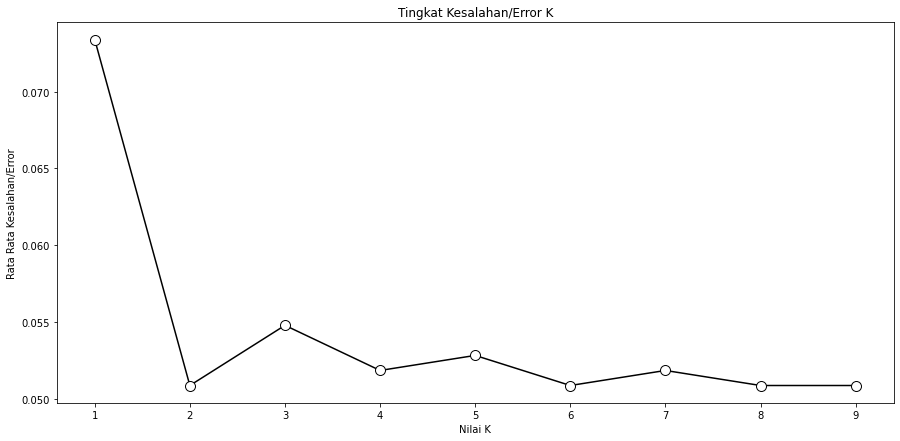

In [ ]:
#visualisasi grafik/plot
#mengimport accuracy score dari sklearn.metrics
from sklearn.metrics import accuracy_score
#mengimport libarary matplotlib.pyplot
import matplotlib.pyplot as plt
#menampilkan akurasi nilai
accuracy_score(y_test,y_pred) 
#perbandingan Tingkat Kesalahan dengan K Value
error = [] 
#hitung kesalahan K values dengan nilai antara 1 dan 10
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    predict_i = knn.predict(x_test)
    error.append(np.mean(predict_i != y_test))
#pembuatan diagram plot
y = plt.figure(figsize=(15,7))  
plt.plot(range(1, 10), error, color = 'black', linestyle = '-', marker = 'o', markerfacecolor = 'white', markersize = 10)
plt.title('Tingkat Kesalahan/Error K')  
plt.xlabel('Nilai K')  
plt.ylabel('Rata Rata Kesalahan/Error') 
plt.show()